### For the same statistical areas, plot salary of postdocs and salary of everyone else

In [2]:
%load_ext autoreload
%autoreload 2

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from tqdm.autonotebook import tqdm
from postdocsalary.paths import DATA_DIR, ensure_dir
import urllib.request
pd.set_option('display.max_columns', None)


<ipython-input-3-1570110eca21>:5: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  from tqdm.autonotebook import tqdm


In [4]:
university_df = pd.read_pickle(DATA_DIR/ 'university_ranking_salary.pickle')
len(university_df)

6448

In [5]:
university_df[:4]

,World Rank,Institution,Country,National Rank,Quality of Education Rank,Alumni Employment Rank,Quality of Faculty Rank,Research Performance Rank,Score,UNITID,INSTNM,IALIAS,ADDR,CITY,STABBR,ZIP,FIPS,OBEREG,CHFNM,CHFTITLE,GENTELE,EIN,DUNS,OPEID,OPEFLAG,WEBADDR,ADMINURL,FAIDURL,APPLURL,NPRICURL,VETURL,ATHURL,DISAURL,SECTOR,ICLEVEL,CONTROL,HLOFFER,UGOFFER,GROFFER,HDEGOFR1,DEGGRANT,HBCU,HOSPITAL,MEDICAL,TRIBAL,LOCALE,OPENPUBL,ACT,NEWID,DEATHYR,CLOSEDAT,CYACTIVE,POSTSEC,PSEFLAG,PSET4FLG,RPTMTH,INSTCAT,C18BASIC,C18IPUG,C18IPGRD,C18UGPRF,C18ENPRF,C18SZSET,C15BASIC,CCBASIC,CARNEGIE,LANDGRNT,INSTSIZE,F1SYSTYP,F1SYSNAM,F1SYSCOD,CBSA,CBSATYPE,CSA,NECTA,COUNTYCD,COUNTYNM,CNGDSTCD,LONGITUD,LATITUDE,DFRCGID,DFRCUSCG,LONGITUDE,CBSA_NAME,RPP_all,MEDIAN_SALARY,N_SALARIES,MEDIAN_SALARY_UPPER,MEDIAN_SALARY_LOWER,REAL_MEDIAN_SALARY,REAL_MEDIAN_SALARY_UPPER,REAL_MEDIAN_SALARY_LOWER
0,1.0,Harvard University,USA,1.0,1,1,1,1,100.0,166027.0,Harvard University,,Massachusetts Hall,Cambridge,MA,02138,25.0,1.0,Lawrence S. Bacow,President,6174951000,42103580.0,082359691|149617367|047006379,215500.0,1.0,www.harvard.edu/,college.harvard.edu/admissions,college.harvard.edu/financial-aid,college.harvard.edu/admissions/application-pro...,college.harvard.edu/financial-aid/net-price-ca...,sfs.harvard.edu/veteran-military-benefits,,accessibility.harvard.edu/,2.0,1.0,2.0,9.0,1.0,1.0,11.0,1.0,2.0,2.0,1.0,2.0,12.0,1.0,A,-2.0,-2.0,-2,1.0,1.0,1.0,1.0,1.0,2.0,15.0,8.0,14.0,14.0,6.0,17.0,15.0,15.0,15.0,2.0,5.0,2.0,-2,-2.0,14460,1,148,71650.0,25017,Middlesex County,2505.0,-71.118313,42.374471,96.0,1.0,-71.118313,"Boston-Cambridge-Newton, MA-NH",115.5,55783.941620,493,56164.312487,55205.642506,48297.784952,48627.110378,47797.093079
1,2.0,Massachusetts Institute of Technology,USA,2.0,4,12,2,8,96.7,166683.0,Massachusetts Institute of Technology,"MIT, M.I.T.",77 Massachusetts Avenue,Cambridge,MA,02139-4307,25.0,1.0,L. Rafael Reif,President,6172531000,42103594.0,001425594,217800.0,1.0,web.mit.edu/,https://mitadmissions.org/,https://sfs.mit.edu/,my.mit.edu/,https://sfs.mit.edu/undergraduate-students/our...,https://sfs.mit.edu/undergraduate-students/typ...,,studentlife.mit.edu/das,2.0,1.0,2.0,9.0,1.0,1.0,12.0,1.0,2.0,2.0,2.0,2.0,12.0,1.0,A,-2.0,-2.0,-2,1.0,1.0,1.0,1.0,1.0,2.0,15.0,14.0,15.0,14.0,6.0,17.0,15.0,15.0,15.0,1.0,4.0,2.0,-2,-2.0,14460,1,148,71650.0,25017,Middlesex County,2507.0,-71.093226,42.359243,96.0,1.0,-71.093226,"Boston-Cambridge-Newton, MA-NH",115.5,56659.816586,680,56952.349035,56164.312487,49056.118257,49309.393104,48627.110378
2,3.0,Stanford University,USA,3.0,10,4,3,2,95.1,243744.0,Stanford University,,,Stanford,CA,94305,6.0,8.0,Marc Tessier-Lavigne,President,6507232300,941156365.0,009214214,130500.0,1.0,www.stanford.edu/,admission.stanford.edu/,financialaid.stanford.edu/,commonapp.org/,www.stanford.edu/dept/finaid/undergrad/how/cal...,exploredegrees.stanford.edu/veterans/,parents.stanford.edu/2015/11/09/stanford-athle...,diversityandaccess.stanford.edu/disability-access,2.0,1.0,2.0,9.0,1.0,1.0,11.0,1.0,2.0,1.0,1.0,2.0,21.0,1.0,A,-2.0,-2.0,-2,1.0,1.0,1.0,1.0,1.0,2.0,15.0,11.0,14.0,14.0,6.0,17.0,15.0,15.0,15.0,2.0,4.0,2.0,-2,-2.0,41940,1,488,-2.0,6085,Santa Clara County,618.0,-122.167359,37.429434,96.0,1.0,-122.167359,"San Jose-Sunnyvale-Santa Clara, CA",126.7,62476.603840,349,63319.925605,62352.688787,49310.658122,49976.263303,49212.856186
3,6.0,Princeton University,USA,4.0,5,15,7,70,92.6,186131.0,Princeton University,,1 Nassau Hall,Princeton,NJ,08544-0070,34.0,2.0,Christopher L. Eisgruber,President,6092583000,210634501.0,002484665,262700.0,1.0,www.princeton.edu/,,,,www.princeton.edu/admission/financialaid/estim...,registrar.princeton.edu/student-services/veter...,fs.ncaa.org/Docs/newmedia/public/rates/index.html,www.princeton.edu/ods/,2.0,1.0,2.0,9.0,1.0,1.0,12.0,1.0,2.0,2.0,2.0,2.0,13.0,1.0,A,-2.0,-2.0,-2,1.0,1.0,1.0,1.0,1.0,2.0,15.0,11.0,15.0,14.0,5.0,14.0,15.0,15.0,15.0,2.0,3.0,2.0,-2,-2.0,45940,1,408,-2.0,34021,Mercer County,3412.0,-74.659365,40.348732,96

### Threshold number of salaries

28260
27652
131


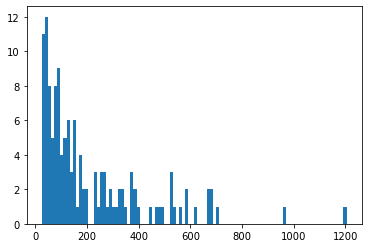

In [6]:
MIN_N_SALARIES = 25
print(university_df.N_SALARIES.sum())
university_df = university_df[university_df.N_SALARIES > MIN_N_SALARIES]
print(university_df.N_SALARIES.sum())
plt.hist(university_df.N_SALARIES, bins = 100);
print(len(university_df))

#### Get difference between median salary and salary for university

In [7]:
median_university_salary_real = np.median(university_df["REAL_MEDIAN_SALARY"])
median_university_salary_real

52200.15429370554

In [8]:
median_university_salary = np.median(university_df["MEDIAN_SALARY"])
median_university_salary

52517.546297006054

In [9]:
university_df["UNIVERSITY_REAL_SALARY_RELATIVE_MEDIAN"] = (
    university_df["REAL_MEDIAN_SALARY"] - median_university_salary_real
)
university_df["UNIVERSITY_REAL_SALARY_RELATIVE_MEDIAN_UPPER"] = (
    university_df["REAL_MEDIAN_SALARY_UPPER"] - median_university_salary_real
)
university_df["UNIVERSITY_REAL_SALARY_RELATIVE_MEDIAN_LOWER"] = (
    university_df["REAL_MEDIAN_SALARY_LOWER"] - median_university_salary_real
)

In [10]:
university_df["UNIVERSITY_SALARY_RELATIVE_MEDIAN"] = university_df["MEDIAN_SALARY"] - median_university_salary
university_df["UNIVERSITY_SALARY_RELATIVE_MEDIAN_UPPER"] = (
    university_df["MEDIAN_SALARY_UPPER"] - median_university_salary
)
university_df["UNIVERSITY_SALARY_RELATIVE_MEDIAN_LOWER"] = (
    university_df["MEDIAN_SALARY_LOWER"] - median_university_salary
)

In [11]:
nex = 25
top_n = 150

In [12]:
import seaborn as sns

In [13]:
pal = sns.color_palette('Set1', 10)
pal

[(0.8941176470588236, 0.10196078431372549, 0.10980392156862745),
 (0.21568627450980393, 0.49411764705882355, 0.7215686274509804),
 (0.30196078431372547, 0.6862745098039216, 0.2901960784313726),
 (0.596078431372549, 0.3058823529411765, 0.6392156862745098),
 (1.0, 0.4980392156862745, 0.0),
 (1.0, 1.0, 0.2),
 (0.6509803921568628, 0.33725490196078434, 0.1568627450980392),
 (0.9686274509803922, 0.5058823529411764, 0.7490196078431373),
 (0.6, 0.6, 0.6),
 (0.8941176470588236, 0.10196078431372549, 0.10980392156862745)]

[Text(0, 0, '-$10k'),
 Text(0, 0, '-$5k'),
 Text(0, 0, '$0'),
 Text(0, 0, '$5k'),
 Text(0, 0, '$10k')]

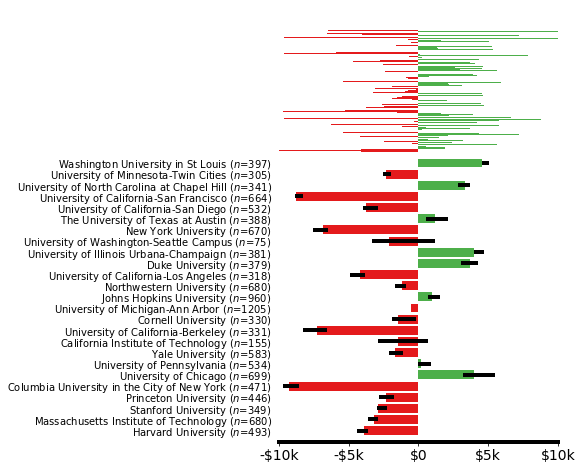

In [14]:
sort_mask = np.argsort(university_df["National Rank"].values)
fig, axs = plt.subplots(
    nrows=2,
    figsize=(5, 8),
    gridspec_kw={"wspace": 0, "hspace": 0, "height_ratios": [1, 2]},
)

ax = axs[0]
y = university_df["UNIVERSITY_REAL_SALARY_RELATIVE_MEDIAN"].values[sort_mask][nex:top_n]
ax.barh(
    np.arange(len(university_df))[nex:top_n],
    y,
    color=[pal[2] if np.sign(i) > 0 else pal[0] for i in y],
)
ax.set_xlim([-10000, 10000])
ax.set_ylim([nex, top_n])
# ax.set_xticks([])
[i.set_linewidth(0.0) for i in ax.spines.values()]
ax.set_yticks([])
ax.set_xticks([])

ax = axs[1]
y = university_df["UNIVERSITY_REAL_SALARY_RELATIVE_MEDIAN"].values[sort_mask][:nex]
ax.barh(
    np.arange(len(university_df))[:nex] + 1,
    y,
    color=[pal[2] if np.sign(i) > 0 else pal[0] for i in y],
)
[i.set_linewidth(0.0) for i in ax.spines.values()]
ax.tick_params(left=False)

xerr = np.array((
        y - university_df.UNIVERSITY_REAL_SALARY_RELATIVE_MEDIAN_LOWER.values[sort_mask][
            :nex
        ],
        y - university_df.UNIVERSITY_REAL_SALARY_RELATIVE_MEDIAN_UPPER.values[sort_mask][
            :nex
        ],
    ))
xerr[1,:] *= -1
ax.errorbar(
    y,
    np.arange(len(university_df))[:nex] + 1,
    xerr=xerr,
    ls='none',
    color = 'k',
    lw = 4
    
)

# ax.axvline(0, color="k", ls="dashed")
# ax.set_xlabel('University ranking (ranked)')
# ax.set_ylabel('Regional salary value relative median ($)')
# ax.set_yscale('log')
ax.set_xlim([-10000, 10000])
ax.set_ylim([0, nex + 1])
# ax.set_xticks([])
ax.set_yticks(np.arange(1, nex + 1))

names = [
    "{} ($n$={})".format(i, j)
    for i, j in zip(
        university_df["INSTNM"].values[sort_mask][:nex],
        university_df["N_SALARIES"].values[sort_mask][:nex],
    )
    
]
ax.set_yticklabels(names)
# ax.set_yticklabels(university_df["institution"].values[sort_mask][:20])
ax.spines["bottom"].set_linewidth(4)
ax.xaxis.set_tick_params(labelsize=14)
ax.set_xticks([-10000, -5000, 0, 5000, 10000])
ax.set_xticklabels(["-$10k", "-$5k", "$0", "$5k", "$10k"])
#save_fig(FIGURE_DIR / 'institution_real salary')

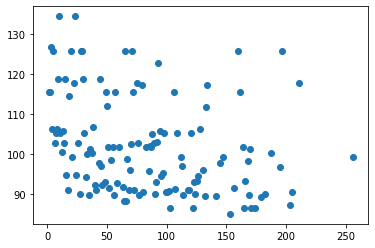

In [15]:
plt.scatter(university_df['National Rank'], university_df['RPP_all'])

[Text(0, 0, '60'),
 Text(0, 0, '80'),
 Text(0, 0, '100'),
 Text(0, 0, '120'),
 Text(0, 0, '140')]

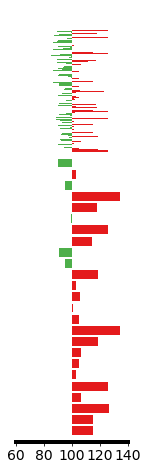

In [16]:
sort_mask = np.argsort(university_df["National Rank"].values)
fig, axs = plt.subplots(
    nrows=2,
    figsize=(2, 8),
    gridspec_kw={"wspace": 0, "hspace": 0, "height_ratios": [1, 2]},
)

ax = axs[0]
y = university_df["RPP_all"].values[sort_mask][nex:top_n] - 100
ax.barh(
    np.arange(len(university_df))[nex:top_n],
    y,
    color=[pal[0] if np.sign(i) > 0 else pal[2] for i in y],
)
ax.set_ylim([nex, top_n])
ax.set_xlim([-40, 40])
# ax.set_xticks([])
[i.set_linewidth(0.0) for i in ax.spines.values()]
ax.set_yticks([])
ax.set_xticks([])

ax = axs[1]
y = university_df["RPP_all"].values[sort_mask][:nex] - 100
ax.barh(
    np.arange(len(university_df))[:nex] + 1,
    y,
    color=[pal[0] if np.sign(i) > 0 else pal[2] for i in y],
)
[i.set_linewidth(0.0) for i in ax.spines.values()]
ax.tick_params(left=False)


# ax.axvline(0, color="k", ls="dashed")
# ax.set_xlabel('University ranking (ranked)')
# ax.set_ylabel('Regional salary value relative median ($)')
# ax.set_yscale('log')
ax.set_xlim([-40, 40])
ax.set_ylim([0, nex + 1])
# ax.set_xticks([])


if False:
    ax.set_yticks(np.arange(1, nex + 1))
    names = [
        "{} ($n$={})".format(i, j)
        for i, j in zip(
            university_df["INSTNM"].values[sort_mask][:nex],
            university_df["N_SALARIES"].values[sort_mask][:nex],
        )

    ]
    ax.set_yticklabels(names)
else:
    ax.set_yticks([])
# ax.set_yticklabels(university_df["institution"].values[sort_mask][:20])
ax.spines["bottom"].set_linewidth(4)
ax.xaxis.set_tick_params(labelsize=14)
ax.set_xticks([-40, -20, 0, 20, 40])
ax.set_xticklabels(["60", "80", "100", "120", "140"])
#save_fig(FIGURE_DIR / 'institution_real salary')

[Text(0, 0, '-$10k'),
 Text(0, 0, '-$5k'),
 Text(0, 0, '$0'),
 Text(0, 0, '$5k'),
 Text(0, 0, '$10k')]

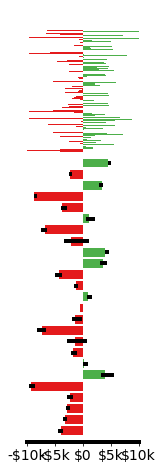

In [17]:
sort_mask = np.argsort(university_df["National Rank"].values)
fig, axs = plt.subplots(
    nrows=2,
    figsize=(2, 8),
    gridspec_kw={"wspace": 0, "hspace": 0, "height_ratios": [1, 2]},
)

ax = axs[0]
y = university_df["UNIVERSITY_REAL_SALARY_RELATIVE_MEDIAN"].values[sort_mask][nex:top_n]
ax.barh(
    np.arange(len(university_df))[nex:top_n],
    y,
    color=[pal[2] if np.sign(i) > 0 else pal[0] for i in y],
)
ax.set_xlim([-10000, 10000])
ax.set_ylim([nex, top_n])
# ax.set_xticks([])
[i.set_linewidth(0.0) for i in ax.spines.values()]
ax.set_yticks([])
ax.set_xticks([])

ax = axs[1]
y = university_df["UNIVERSITY_REAL_SALARY_RELATIVE_MEDIAN"].values[sort_mask][:nex]
ax.barh(
    np.arange(len(university_df))[:nex] + 1,
    y,
    color=[pal[2] if np.sign(i) > 0 else pal[0] for i in y],
)
[i.set_linewidth(0.0) for i in ax.spines.values()]
ax.tick_params(left=False)

xerr = np.array((
        y - university_df.UNIVERSITY_REAL_SALARY_RELATIVE_MEDIAN_LOWER.values[sort_mask][
            :nex
        ],
        y - university_df.UNIVERSITY_REAL_SALARY_RELATIVE_MEDIAN_UPPER.values[sort_mask][
            :nex
        ],
    ))
xerr[1,:] *= -1
ax.errorbar(
    y,
    np.arange(len(university_df))[:nex] + 1,
    xerr=xerr,
    ls='none',
    color = 'k',
    lw = 4
    
)

# ax.axvline(0, color="k", ls="dashed")
# ax.set_xlabel('University ranking (ranked)')
# ax.set_ylabel('Regional salary value relative median ($)')
# ax.set_yscale('log')
ax.set_xlim([-10000, 10000])
ax.set_ylim([0, nex + 1])
# ax.set_xticks([])
if False:
    ax.set_yticks(np.arange(1, nex + 1))
    names = [
        "{} ($n$={})".format(i, j)
        for i, j in zip(
            university_df["INSTNM"].values[sort_mask][:nex],
            university_df["N_SALARIES"].values[sort_mask][:nex],
        )

    ]
    ax.set_yticklabels(names)
else:
    ax.set_yticks([])
# ax.set_yticklabels(university_df["institution"].values[sort_mask][:20])
ax.spines["bottom"].set_linewidth(4)
ax.xaxis.set_tick_params(labelsize=14)
ax.set_xticks([-10000, -5000, 0, 5000, 10000])
ax.set_xticklabels(["-$10k", "-$5k", "$0", "$5k", "$10k"])
#save_fig(FIGURE_DIR / 'institution_real salary')